In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [2]:
def forward(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(Estart)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Ew)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
    return win_prob_r1

In [3]:
def reverse(Estart, Ec, Ew, region, totlen, Emm):
    els = []
    for j in range(totlen):
        el = []
        el.append(-Estart)
        el.append(-Ew)
        for i in range(region[0], region[1]):
            if i == region[1]-j-1:
                el.append(-Emm)
            else:
                el.append(-Ec)
        els.append(el)
    pls = []
    for i in range(len(els)):
        pl = []
        pl.append([0, 0, 0])
        pl.append([0, 1, 0])
        for j in range(len(els[i])-1):
            z = np.exp(-els[i][j])+1+np.exp(els[i][j+1])
            pl.append([np.exp(-els[i][j])/z, 1/z, 1 - 1/z -np.exp(-els[i][j])/z])
        pl.append([0, 1, 0])
        pl.append([0, 0, 0])
        pls.append(pl)
    matrix_array = []
    for j in range(len(pls)):
        matrix = []
        for i in range(len(pls[j])-2):
            line = []
            for k in range(len(pls[j])-2):
                if k == i - 1:
                    line.append(pls[j][k+1][2])
                elif k == i:
                    line.append(pls[j][k+1][1])
                elif k == i + 1:
                    line.append(pls[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)
    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][0][1])
        
    return win_prob_r1

In [4]:
def cut(Estart, Ec, region, totlen, Emm, Ecut, Estop):
    els = []
    for j in range(totlen):
        el = []
        el.append(Ec)
        for i in range(region[0], region[1]):
            if i == j:
                el.append(Emm)
            else:
                el.append(Ec)
        el.append(Estop)
        els.append(el)
    plsm = []
    for j in range(len(els)):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for i in range(len(els[j])-1):
            p = []
            z = 1 + np.exp(-els[j][i])+np.exp(els[j][i+1])
            p.append((1/(1+np.exp(Ecut))*np.exp(-els[j][i])/z))
            p.append((1/(1+np.exp(Ecut))*1/z))
            p.append((1/(1+np.exp(Ecut))*np.exp(els[j][i+1])/z))
            pls.append(p)
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)
    matrix_m = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            if i == len(plsm[j])-3:
                pcut = np.exp(Ecut)/(1+np.exp(Ecut))
                line.append(0)
                for l in range(len(plsm[j])-4):
                    line.append(pcut)
                line.append(1)
                matrix.append(line)
            else:
                for k in range(len(plsm[j])-2):
                    if k == i - 1:
                        line.append(plsm[j][k+1][2])
                    elif k == i:
                        line.append(plsm[j][k+1][1])
                    elif k == i + 1:
                        line.append(plsm[j][k+1][0])
                    else:
                        line.append(0)
                matrix.append(line)
        matrix_m.append(matrix)
    matrix_m = np.array(matrix_m)
    powered_matrix_array = []
    for j in range(len(matrix_m)):
        powered_matrix_array.append(LA.matrix_power(matrix_m[j], 2000000000))
    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [5]:
def cutrate(Estart, Ec, Ew, Emm, Ecut, stop1):
    region1 = [0, int(stop1)]
    totlen = 23
    region2 = [int(stop1), 23]
    Estop = -1000000
    probs = [forward(Estart, Ec, Ew, region1, totlen, Emm), reverse(Ec, Ec, Ew, region1, totlen, Emm), 
            cut(Ec, Ec, region2, totlen, Emm, Ecut, Estop)]
    plsm = []
    for i in range(len(probs[0])):
        pls = []
        pls.append([0, 0, 0])
        pls.append([0, 1, 0])
        for j in range(len(probs)):
            pls.append([1-probs[j][i], 0, probs[j][i]])
        pls.append([0, 1, 0])
        pls.append([0, 0, 0])
        plsm.append(pls)

    matrix_array = []
    for j in range(len(plsm)):
        matrix = []
        for i in range(len(plsm[j])-2):
            line = []
            for k in range(len(plsm[j])-2):
                if k == i - 1:
                    line.append(plsm[j][k+1][2])
                elif k == i:
                    line.append(plsm[j][k+1][1])
                elif k == i + 1:
                    line.append(plsm[j][k+1][0])
                else:
                    line.append(0)
            matrix.append(line)
        matrix_array.append(matrix)
    matrix_array = np.array(matrix_array)

    powered_matrix_array = []
    for j in range(len(matrix_array)):
        powered_matrix_array.append(LA.matrix_power(matrix_array[j], 20000))

    win_prob_r1 = []
    for j in range(len(powered_matrix_array)):
        win_prob_r1.append(powered_matrix_array[j][len(powered_matrix_array[j][i])-1][1])
        
    return win_prob_r1

In [18]:
bounds = [(2.5, 7), (0.9, 1.7), (-7, -13), (-7, -10), (-8, -15), (16, 19)]

In [19]:
def minimizee(x):
    data_lbCpf = [0.123077, 0.007154, 0.032308, 0.038462, 0.323077, 0.346154, 0.138462, 0.161538, 0.000577, 0.1, 0.761538, 1]
    pick = np.arange(0, 24, 2)
    fit_probs = np.take(cutrate(x[0], x[1], x[2], x[3], x[4], x[5]),
                        pick)
    return np.sum(np.square(np.subtract(data_lbCpf, fit_probs)))

In [20]:
#Fitting
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 200, popsize = 20)

In [21]:
new_x = result.x

In [22]:
new_x

array([  2.55975745,   1.01074254, -10.28817791,  -8.77306688,
       -10.90430854,  18.36677349])

In [23]:
data_lbCpf = [[1,3,5,7,9,11,13,15,17,19,21,23],
             [0.123077, 0.007154, 0.032308, 0.038462, 0.323077, 0.346154, 0.138462, 0.161538, 0.000577, 0.1, 0.761538, 1]]

In [24]:
full_length = cutrate(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4], new_x[5])
x = np.arange(1, 30, 1)

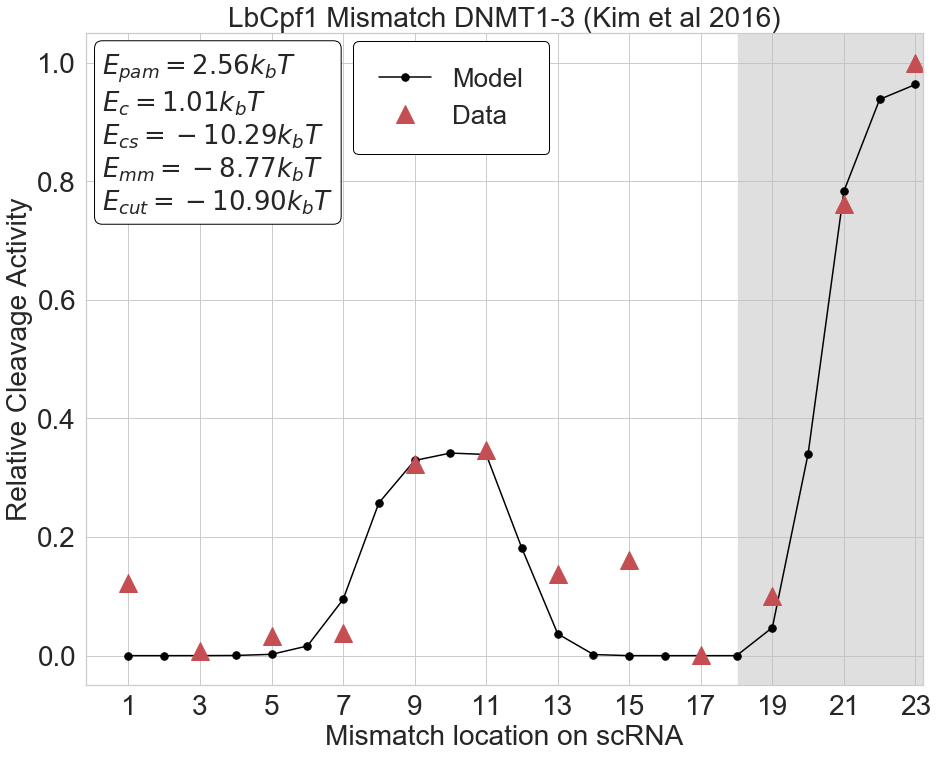

In [25]:
ax = plt.axes()
plt.plot(x[:23], full_length[:23], label = 'Model', c = 'black', lw = 1.5, marker = '.', ms = '15')
plt.plot(data_lbCpf[0], data_lbCpf[1], '^', label = 'Data', ms = 18, c ='r')
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('LbCpf1 Mismatch DNMT1-3 (Kim et al 2016)', fontsize = 28)
plt.ylabel('Relative Cleavage Activity', fontsize = 28)
plt.xlabel('Mismatch location on scRNA', fontsize = 28)
plt.xticks(np.arange(1, 24, 2), fontsize = 28)
plt.yticks(fontsize = 28)
plt.xlim(-0.2, 23.2)
plt.axvspan(18, 24, facecolor='silver', alpha=0.5)
plt.rcParams["figure.figsize"] = (15, 12)
plt.legend(loc=[0.32, 0.814], fancybox =True, borderpad = 1, edgecolor = 'black', fontsize = 26, framealpha = 1)
props = dict(boxstyle='round', facecolor='white', alpha=1, edgecolor = 'black')
textstr = '\n'.join((
    r'$E_{pam}=%.2f$' % (new_x[0], ) + '$k_bT$',
    r'$E_{c}=%.2f$' % (new_x[1], ) + '$k_bT$',
    r'$E_{cs}=%.2f$' % (new_x[2], ) + '$k_bT$', 
    r'$E_{mm}=%.2f$' % (new_x[3], ) + '$k_bT$', r'$E_{cut}=%.2f$' % (new_x[4], ) + '$k_bT$'))
ax.text(0.02, 0.97, textstr, transform=ax.transAxes, fontsize=26,
        verticalalignment='top', bbox=props )
plt.show()